# Using Nanoparticle for analyzing measurements

In [17]:
from kira.model.experiments import Nanoparticle
import matplotlib.pyplot as plt
import os

## Folder structure
You need to write the `metadata.yaml` files to each nanoparticle_meas but not to reference_meas.

Any number of reference_meas or nanoparticle_meas may live in the same measurements_fp
- <measurements_fp>
   - <reference_meas_A>
      - <repetition_i>.txt
   - <nanoparticle_X>
      - metadata.yaml
      - <repetition_i>.txt

You may see `tests/resources/spectophotometer` for a template of how it works

In [18]:
measurements_fp = "../tests/resources/spectophotometer"
nanop_a_fp = os.path.join(measurements_fp, "nanoparticle_A")
nanop_b_fp = os.path.join(measurements_fp, "nanoparticle_B")
nanop_c_fp = os.path.join(measurements_fp, "nanoparticle_C")

## Nanoparticle Class
This class allows you to easily load the folders, crop, rescale and plot your measurements.
Each nanoparticle is composed of identification data such as:
- identity (name)
- dopant
- dopant_concentration
- annealing
- d_xrd

As well as measurements for the nanoparticle and the reference used
- meas
- ref

meas and ref are both `Measurement`s that hold the information of 
- spectrum
- luminescence
- std


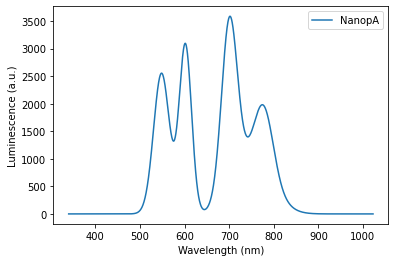

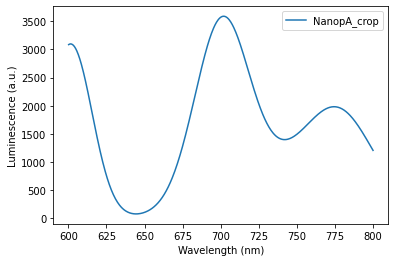

In [19]:
a = Nanoparticle.from_folder(nanop_a_fp)
b = Nanoparticle.from_folder(nanop_b_fp)
c = Nanoparticle.from_folder(nanop_c_fp)

# plot nanoparticle_a just to see how it looks
a.plot(label=a.identity)
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Luminescence (a.u.)")
plt.show()

# let's say we only care about the wavelenghts [600, 800]
# crop all nanoparticles to the specified range
selected_wavelengths = [600, 800]
a.crop(*selected_wavelengths)
b.crop(*selected_wavelengths)
c.crop(*selected_wavelengths)

a.plot(label=a.identity+"_crop")
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Luminescence (a.u.)")
plt.show()

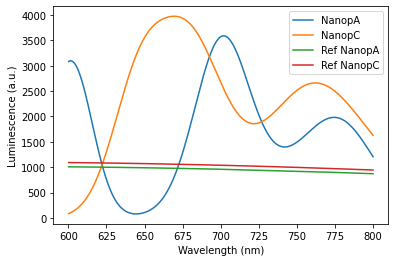

In [20]:
# a and b have the same reference, but c has a different one.
a.plot(label=a.identity)
c.plot(label=c.identity)
a.ref.plot(label=f"Ref {a.identity}")
c.ref.plot(label=f"Ref {c.identity}")
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Luminescence (a.u.)")
plt.show()



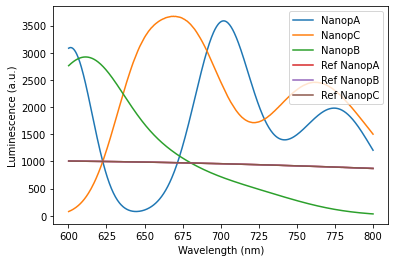

In [21]:
# rescale C so that all the references match
c.crop_rescale_to_new_ref(new_ref=a.ref, lims=selected_wavelengths)

# now all measurements are comparable
a.plot(label=a.identity)
c.plot(label=c.identity)
b.plot(label=b.identity)
a.ref.plot(label=f"Ref {a.identity}")
b.ref.plot(label=f"Ref {b.identity}")
c.ref.plot(label=f"Ref {c.identity}")
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Luminescence (a.u.)")
plt.show()

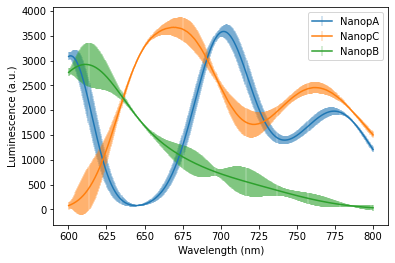

In [22]:
# The standard deviation can be added to the plot in the following way
a.plot(yerr=a.meas.std, label=a.identity, elinewidth=0.4)
c.plot(yerr=a.meas.std, label=c.identity, elinewidth=0.4)
b.plot(yerr=a.meas.std, label=b.identity, elinewidth=0.4)

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Luminescence (a.u.)")
plt.show()

Text(0, 0.5, 'AUC')

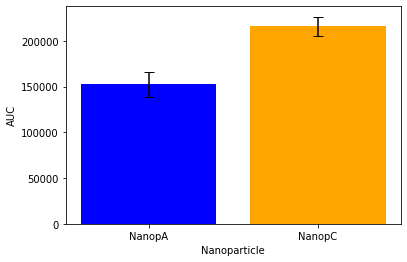

In [23]:
# you may want to get to Area Under the Curve (AUC) and plot it with std.

auc_range = [650,725]
a_auc, a_auc_std = a.meas.auc(*auc_range)
c_auc, c_auc_std = c.meas.auc(*auc_range)
aucs = [a_auc, c_auc]
stds = [a_auc_std, c_auc_std]

plt.bar(x=[a.identity, c.identity], height=aucs, yerr=stds, capsize=5, color=['blue', 'orange'])
plt.xlabel("Nanoparticle")
plt.ylabel("AUC")